<a href="https://colab.research.google.com/github/avanegasp/talleres-DS-Uc/blob/main/Copia_de_Apuntes_g36_M4_Limpieza_Valores_faltantes_y_atipicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

# **Taller guiado de limpieza de valores faltantes y datos atípicos**

Este taller guiado tiene como objetivo hacer un acercamiento práctico a la limpieza y preparación de un conjunto de datos.

En este taller guiado veremos como:
* Corregir valores faltantes- eliminación o reemplazo
* Detección de valores atípicos

## **1. Instalar e importar los paquetes necesarios**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## **2. Cargar datos**

Cargamos un dataset con 100.974 observaciones obtenido de un muestreo de los resultados del ICFES 2020 segundo periodo. Este es un subconjunto del dataset original donde se han escogido 14 variables de estudio. La variable V1 fue creada durante el procesamiento que permitió la creación del dataset. Cada observación pertenece a los datos de un estudiante, se puede encontrar información socioeconómica del estudiante y su familia. El objetivo de análisis principal de este dataset es identificar el impacto de las condiciones socieconómicoas sobre el desempeño general de la prueba `PUNT_GLOBAL`. El enfoque en este notebook es hacer el trabajo de limpieza del dataset, puede realizar la exploración por su cuenta.

In [ ]:
icfes = pd.read_csv('https://raw.githubusercontent.com/HarryVargas96/ICFES/main/icfes_2020_reducido.csv')

In [ ]:
icfes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100974 entries, 0 to 100973
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            100974 non-null  int64 
 1   ESTU_GENERO           100972 non-null  object
 2   ESTU_FECHANACIMIENTO  100974 non-null  object
 3   ESTU_TIENEETNIA       100363 non-null  object
 4   ESTU_DEPTO_RESIDE     100974 non-null  object
 5   FAMI_ESTRATOVIVIENDA  97576 non-null   object
 6   FAMI_EDUCACIONPADRE   98373 non-null   object
 7   FAMI_EDUCACIONMADRE   98267 non-null   object
 8   FAMI_TIENEINTERNET    98274 non-null   object
 9   FAMI_TIENECOMPUTADOR  96928 non-null   object
 10  COLE_NATURALEZA       100974 non-null  object
 11  COLE_AREA_UBICACION   100974 non-null  object
 12  COLE_JORNADA          100974 non-null  object
 13  PUNT_GLOBAL           100974 non-null  int64 
 14  ESTU_GENERACION-E     100974 non-null  object
dtypes: int64(2), obje

A su vez también cargamos una serie de tiempo, estos datos provienen de un sensor ambiental ubicado en la ciudad de Londres. Corresponde a las mediciones de la concentración de material particulado PM2.5 es decir, diametro de 2.5 micras o menos durante el año de 2018 con una frecuencia de recolección de 15 minutos. Para más información del dataset consulte [aquí](https://www.londonair.org.uk/london/asp/datadownload.asp).

In [ ]:
air = pd.read_csv('https://raw.githubusercontent.com/HarryVargas96/UdeCataluna/main/Londonair.csv')

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     35040 non-null  object 
 1   Species                  35040 non-null  object 
 2   ReadingDateTime          35040 non-null  object 
 3   Value                    32136 non-null  float64
 4   Units                    35040 non-null  object 
 5   Provisional or Ratified  35040 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.6+ MB


## **3. Dataset ICFES**



In [ ]:
icfes.head()

,Unnamed: 0,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,ESTU_GENERACION-E
0,453241,M,27/04/2002,No,CUNDINAMARCA,Estrato 3,No sabe,No sabe,Si,Si,OFICIAL,URBANO,MAÑANA,267,NO
1,387781,M,19/05/2005,Si,VALLE,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,282,NO
2,77011,F,07/08/2002,Si,NARIÑO,Estrato 1,Educación profesional completa,Secundaria (Bachillerato) completa,Si,No,OFICIAL,URBANO,MAÑANA,226,GENERACION E - GRATUIDAD
3,135370,M,03/10/2001,Si,BOGOTÁ,Estrato 2,Postgrado,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,MAÑANA,237,NO
4,31081,M,21/08/2002,No,ANTIOQUIA,Estrato 2,Educación profesional incompleta,Primaria incompleta,Si,Si,OFICIAL,URBANO,MAÑANA,229,NO


In [ ]:
icfes.ESTU_FECHANACIMIENTO.nunique()

4702

In [ ]:
icfes.describe()

,Unnamed: 0,PUNT_GLOBAL
count,100974.000000,100974.000000
mean,252481.857983,248.445986
std,145788.076596,48.741511
min,4.000000,0.000000
25%,126054.500000,211.000000
50%,252170.500000,245.000000
75%,379022.750000,282.000000
max,504868.000000,500.000000


In [ ]:
icfes.describe(include = 'object')

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_GENERACION-E
count,100972,100974,100363,100974,97576,98373,98267,98274,96928,100974,100974,100974,100974
unique,2,4702,2,34,7,12,12,2,2,2,2,6,4
top,F,11/11/2003,No,BOGOTÁ,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,NO
freq,55368,188,93992,15475,36525,24072,27761,68603,58708,78384,84481,40277,51389


In [ ]:
# Cantidad de valores que tomar la variable
icfes['ESTU_GENERACION-E'].nunique()

In [ ]:
# Valores que toma la variable
icfes['ESTU_GENERACION-E'].unique()

array(['NO', 'GENERACION E - GRATUIDAD',
       'GENERACION E - EXCELENCIA NACIONAL',
       'GENERACION E - EXCELENCIA DEPARTAMENTAL'], dtype=object)

In [ ]:
# Conteo agrupado
icfes.groupby(['FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET']).size()*100/len(icfes)

FAMI_TIENECOMPUTADOR  FAMI_TIENEINTERNET
No                    No                    23.046527
                      Si                    14.699824
Si                    No                     5.771783
                      Si                    52.255036
dtype: float64

In [ ]:
# Conteo de valores / tabla de frecuencia
icfes.ESTU_GENERO.value_counts(normalize = True)

F    0.54835
M    0.45165
Name: ESTU_GENERO, dtype: float64

### Conversión y transformación de variables

Para facilitar el trabajo vamos a transformar las variables cualitativas que aparecen como character en factores, y vamos a eliminar la variable V1.

In [ ]:
icfes.head()

,Unnamed: 0,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,ESTU_GENERACION-E
0,453241,M,27/04/2002,No,CUNDINAMARCA,Estrato 3,No sabe,No sabe,Si,Si,OFICIAL,URBANO,MAÑANA,267,NO
1,387781,M,19/05/2005,Si,VALLE,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,282,NO
2,77011,F,07/08/2002,Si,NARIÑO,Estrato 1,Educación profesional completa,Secundaria (Bachillerato) completa,Si,No,OFICIAL,URBANO,MAÑANA,226,GENERACION E - GRATUIDAD
3,135370,M,03/10/2001,Si,BOGOTÁ,Estrato 2,Postgrado,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,MAÑANA,237,NO
4,31081,M,21/08/2002,No,ANTIOQUIA,Estrato 2,Educación profesional incompleta,Primaria incompleta,Si,Si,OFICIAL,URBANO,MAÑANA,229,NO


In [ ]:
# Listar variables

In [ ]:
icfes.columns

Index(['Unnamed: 0', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_TIENEETNIA',
       'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR',
       'COLE_NATURALEZA', 'COLE_AREA_UBICACION', 'COLE_JORNADA', 'PUNT_GLOBAL',
       'ESTU_GENERACION-E', 'ESTU_EDAD'],
      dtype='object')

In [ ]:
# Copiar variable / columna
icfes['id'] = icfes['Unnamed: 0']

In [ ]:
# Eliminación de variable, recuerde crear una copia si no está seguro de eliminar la variable de manera permanente
icfes_copy = icfes

# Hacen lo mismo
icfes_2 = icfes.drop(columns = ['Unnamed: 0'])

In [ ]:
icfes_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100974 entries, 0 to 100973
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ESTU_GENERO           100972 non-null  object
 1   ESTU_FECHANACIMIENTO  100974 non-null  object
 2   ESTU_TIENEETNIA       100363 non-null  object
 3   ESTU_DEPTO_RESIDE     100974 non-null  object
 4   FAMI_ESTRATOVIVIENDA  97576 non-null   object
 5   FAMI_EDUCACIONPADRE   98373 non-null   object
 6   FAMI_EDUCACIONMADRE   98267 non-null   object
 7   FAMI_TIENEINTERNET    98274 non-null   object
 8   FAMI_TIENECOMPUTADOR  96928 non-null   object
 9   COLE_NATURALEZA       100974 non-null  object
 10  COLE_AREA_UBICACION   100974 non-null  object
 11  COLE_JORNADA          100974 non-null  object
 12  PUNT_GLOBAL           100974 non-null  int64 
 13  ESTU_GENERACION-E     100974 non-null  object
dtypes: int64(1), object(13)
memory usage: 10.8+ MB


La variable `ESTU_FECHANACIMIENTO` tal como está no sirve para el análisis, es necesario crear la variable `EDAD`.


Para eso vamos a usar la libreria lubridate y una función nueva. Como queremos saber la edad de los estudiantes al momento de presentar la prueba debemos tener presente que la prueba se realizó el 9 de agosto de 2020.

In [ ]:
type('27/06/2023')

str

In [ ]:
# No podemos operar los strings
'27/06/2023' - '24/06/2023'

TypeError: ignored

In [ ]:
datetime.strptime('21/08/2023', '%d/%m/%Y').weekday()

0

In [ ]:
# Tenemos que transformar la edad en un objeto de fecha
type(datetime.strptime('27/06/2023', '%d/%m/%Y'))

datetime.datetime

In [ ]:
# Extraer el año
datetime.strptime('27/06/2023', '%d/%m/%Y').year

2023

In [ ]:
datetime.now()

datetime.datetime(2023, 8, 29, 23, 19, 8, 713139)

In [ ]:
# strptime es un método que permite convertir un string a fecha de acuerdo
def calcular_edad(fecha_nacimiento):

    fecha_nacimiento_aux = datetime.strptime(fecha_nacimiento, '%d/%m/%Y') # Fecha nacimiento
    fecha_presentacion_prueba = datetime.strptime('09/08/2020', '%d/%m/%Y') #Fecha presentación examen

    return fecha_presentacion_prueba.year - fecha_nacimiento_aux.year # Edad el día de presentación del examen

In [ ]:
from datetime import datetime

def calcular_edad(fecha_nacimiento:str)-> int:
    """
    Calcula la edad de una persona en años en base a su fecha de nacimiento y la fecha de presentación de un examen.

    Args:
        fecha_nacimiento (str): La fecha de nacimiento en formato 'dd/mm/yyyy'.

    Returns:
        int: La edad de la persona en años en la fecha de presentación del examen.
    """

    fecha_nacimiento_aux = datetime.strptime(fecha_nacimiento, '%d/%m/%Y')
    fecha_presentacion_prueba = datetime.strptime('09/08/2020', '%d/%m/%Y')

    edad = fecha_presentacion_prueba.year - fecha_nacimiento_aux.year
    return edad


In [ ]:
calcular_edad('18/04/1999') # Celda de prueba

21

Para la transformación de los datos se utiliza una método de mapeo conocido como `apply`, lo que haremos será aplicar la función `edad` declarada anteriormente sobre todas las filas del dataset `icfes`.

In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {'numeros': [2, 5, 8, 11, 14]}
df = pd.DataFrame(data)
df


,numeros
0,2
1,5
2,8
3,11
4,14


In [ ]:
# Aplicar una función lambda a la columna 'numeros' para duplicar cada número
df['numeros_duplicados'] = df['numeros'].apply(lambda fila: fila * 2)

# Mostrar el DataFrame resultante
print(df)

   numeros  numeros_duplicados
0        2                   4
1        5                  10
2        8                  16
3       11                  22
4       14                  28


In [ ]:
# Aplicar la función de transformación

icfes_2['ESTU_EDAD']  = icfes_2['ESTU_FECHANACIMIENTO'].apply( lambda x: calcular_edad(x) ) # anonima

In [ ]:
# Aplicar la función de transformación

icfes_2['ESTU_EDAD']  = icfes_2['ESTU_FECHANACIMIENTO'].apply( calcular_edad )

In [ ]:
icfes.head()

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,ESTU_GENERACION-E,ESTU_EDAD
0,M,27/04/2002,No,CUNDINAMARCA,Estrato 3,No sabe,No sabe,Si,Si,OFICIAL,URBANO,MAÑANA,267,NO,18
1,M,19/05/2005,Si,VALLE,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,282,NO,15
2,F,07/08/2002,Si,NARIÑO,Estrato 1,Educación profesional completa,Secundaria (Bachillerato) completa,Si,No,OFICIAL,URBANO,MAÑANA,226,GENERACION E - GRATUIDAD,18
3,M,03/10/2001,Si,BOGOTÁ,Estrato 2,Postgrado,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,MAÑANA,237,NO,19
4,M,21/08/2002,No,ANTIOQUIA,Estrato 2,Educación profesional incompleta,Primaria incompleta,Si,Si,OFICIAL,URBANO,MAÑANA,229,NO,18


### Detección y corrección de datos atípicos


Hagamos una revisión e inspección visual de la variable `EDAD` usando un boxplot. Es bastante claro la presencia de valores atípicos, con una edad máxima de 2018.

<Axes: xlabel='ESTU_EDAD'>

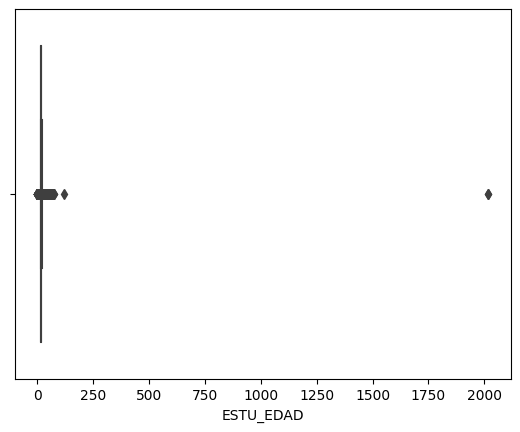

In [ ]:
sns.boxplot(data=icfes_2, x='ESTU_EDAD')

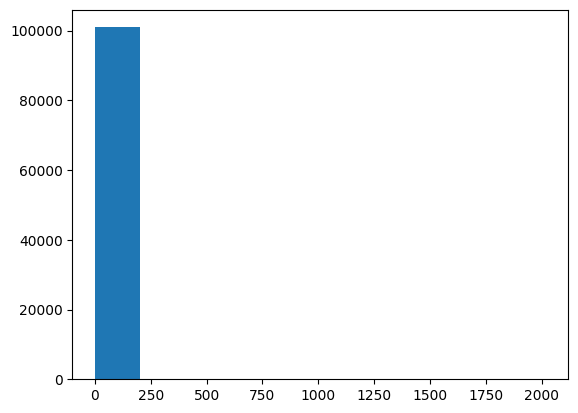

In [ ]:
plt.hist( icfes_2['ESTU_EDAD'])
plt.show();

In [ ]:
icfes_2.describe()

,PUNT_GLOBAL,ESTU_EDAD
count,100974.000000,100974.000000
mean,248.445986,17.635966
std,48.741511,9.357959
min,0.000000,0.000000
25%,211.000000,17.000000
50%,245.000000,17.000000
75%,282.000000,18.000000
max,500.000000,2018.000000


In [ ]:
icfes_2.ESTU_EDAD.value_counts(normalize = False)

17      42935
16      22437
18      20284
19       8276
20       2562
        ...  
73          1
2018        1
2017        1
5           1
120         1
Name: ESTU_EDAD, Length: 69, dtype: int64

In [ ]:
# Parámetros
limite_inferior = 14
limite_superior = 100


# Funcionalidad
icfes_3 = icfes_2[
    (icfes_2['ESTU_EDAD'] >= limite_inferior)  # primera condicion
    & # operador lógico
    (icfes_2['ESTU_EDAD'] <= limite_superior) # segunda condicion
     ]

In [ ]:
registros_eliminados = len(icfes_2)-len(icfes_3)

porcentaje =  round(registros_eliminados *100/len(icfes_2),2)

print(f'Se eliminaron {registros_eliminados} registros\nEquivalente a un {porcentaje} %')
# \n alt + 92

Se eliminaron 63 registros
Equivalente a un 0.06 %


In [ ]:
# Formateo de strings

nombre = 'Harry'
edad = 27

mensaje = 'Mi nombre es ' + nombre + ' y mi edad es ' + str(edad) + ' años'
print(mensaje)

mensaje2 = f'Mi nombre es {nombre} y mi edad es {edad} años'
print(mensaje2)

Mi nombre es Harry y mi edad es 27 años
Mi nombre es Harry y mi edad es 27 años


In [ ]:
icfes_3.head(20)

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,ESTU_GENERACION-E,ESTU_EDAD
0,M,27/04/2002,No,CUNDINAMARCA,Estrato 3,No sabe,No sabe,Si,Si,OFICIAL,URBANO,MAÑANA,267,NO,18
1,M,19/05/2005,Si,VALLE,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,282,NO,15
2,F,07/08/2002,Si,NARIÑO,Estrato 1,Educación profesional completa,Secundaria (Bachillerato) completa,Si,No,OFICIAL,URBANO,MAÑANA,226,GENERACION E - GRATUIDAD,18
3,M,03/10/2001,Si,BOGOTÁ,Estrato 2,Postgrado,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,MAÑANA,237,NO,19
4,M,21/08/2002,No,ANTIOQUIA,Estrato 2,Educación profesional incompleta,Primaria incompleta,Si,Si,OFICIAL,URBANO,MAÑANA,229,NO,18
5,F,04/08/2003,No,BOGOTÁ,Estrato 3,Técnica o tecnológica completa,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,UNICA,255,NO,17
6,F,14/07/2004,No,ANTIOQUIA,Estrato 2,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,No,OFICIAL,URBANO,COMPLETA,218,NO,16
7,M,07/06/2003,No,SANTANDER,Estrato 2,Primaria completa,Primaria completa,No,No,OFICIAL,RURAL,COMPLETA,217,GENERACION E - GRATUIDAD,17
8,M,17/04/2003,No,ANTIOQUIA,Estrato 2,Primaria incompleta,Primaria completa,Si,No,OFICIAL,URBANO,SABATINA,266,GENERACION E - GRATUIDAD,17
9,F,11/07/2003,No,VALLE,Estrato 1,Primaria incompleta,Secundaria (Bachillerato) incompleta,Si,No,NO OFICIAL,URBANO,MAÑANA,180,GENERACION E - GRATUIDAD,17


In [ ]:
clientes_eliminar = [0,1,4,7,12]

icfes_3.drop(clientes_eliminar).head(20)

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,ESTU_GENERACION-E,ESTU_EDAD
2,F,07/08/2002,Si,NARIÑO,Estrato 1,Educación profesional completa,Secundaria (Bachillerato) completa,Si,No,OFICIAL,URBANO,MAÑANA,226,GENERACION E - GRATUIDAD,18
3,M,03/10/2001,Si,BOGOTÁ,Estrato 2,Postgrado,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,MAÑANA,237,NO,19
5,F,04/08/2003,No,BOGOTÁ,Estrato 3,Técnica o tecnológica completa,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,UNICA,255,NO,17
6,F,14/07/2004,No,ANTIOQUIA,Estrato 2,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,No,OFICIAL,URBANO,COMPLETA,218,NO,16
8,M,17/04/2003,No,ANTIOQUIA,Estrato 2,Primaria incompleta,Primaria completa,Si,No,OFICIAL,URBANO,SABATINA,266,GENERACION E - GRATUIDAD,17
9,F,11/07/2003,No,VALLE,Estrato 1,Primaria incompleta,Secundaria (Bachillerato) incompleta,Si,No,NO OFICIAL,URBANO,MAÑANA,180,GENERACION E - GRATUIDAD,17
10,F,19/01/2004,No,BOGOTÁ,Estrato 3,Educación profesional incompleta,Postgrado,Si,Si,NO OFICIAL,URBANO,COMPLETA,288,NO,16
11,M,22/07/2003,No,HUILA,Estrato 3,Ninguno,Primaria incompleta,Si,Si,OFICIAL,RURAL,UNICA,208,GENERACION E - GRATUIDAD,17
13,M,12/01/2004,No,VALLE,Estrato 2,Primaria completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,163,NO,16
14,F,30/07/2004,No,CORDOBA,Estrato 1,Secundaria (Bachillerato) completa,Educación profesional completa,Si,Si,NO OFICIAL,URBANO,COMPLETA,322,GENERACION E - GRATUIDAD,16


In [ ]:
icfes_3.reset_index(names = 'cliente_id', inplace = True)

In [ ]:
icfes_3

,cliente_id,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,ESTU_GENERACION-E,ESTU_EDAD
0,0,M,27/04/2002,No,CUNDINAMARCA,Estrato 3,No sabe,No sabe,Si,Si,OFICIAL,URBANO,MAÑANA,267,NO,18
1,1,M,19/05/2005,Si,VALLE,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,282,NO,15
2,2,F,07/08/2002,Si,NARIÑO,Estrato 1,Educación profesional completa,Secundaria (Bachillerato) completa,Si,No,OFICIAL,URBANO,MAÑANA,226,GENERACION E - GRATUIDAD,18
3,3,M,03/10/2001,Si,BOGOTÁ,Estrato 2,Postgrado,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,MAÑANA,237,NO,19
4,4,M,21/08/2002,No,ANTIOQUIA,Estrato 2,Educación profesional incompleta,Primaria incompleta,Si,Si,OFICIAL,URBANO,MAÑANA,229,NO,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100906,100969,M,01/10/2002,No,BOGOTÁ,Estrato 2,Educación profesional completa,Educación profesional completa,Si,Si,NO OFICIAL,URBANO,COMPLETA,320,NO,18
100907,100970,M,28/08/2003,Si,SAN ANDRES,Estrato 3,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,Si,Si,NO OFICIAL,URBANO,MAÑANA,263,GENERACION E - GRATUIDAD,17
100908,100971,M,21/05/2003,No,BOGOTÁ,Estrato 3,No sabe,Educación profesional completa,Si,Si,NO OFICIAL,URBANO,COMPLETA,244,NO,17
100909,100972,F,15/03/2002,No,ATLANTICO,Estrato 6,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,Si,Si,NO OFICIAL,URBANO,MAÑANA,215,NO,18


In [ ]:
clientes_eliminar_2 = [100972,100973]
# icfes.head()

icfes_a = icfes_3[ icfes_3['cliente_id'].isin(clientes_eliminar_2)]
# Quitarme clientes usando el campo Id, que estan dentro de la lista

# virgulilla alt + 126   ~

In [ ]:
icfes_a.describe()

,cliente_id,PUNT_GLOBAL,ESTU_EDAD
count,2.000000,2.000000,2.000000
mean,100972.500000,234.500000,17.000000
std,0.707107,27.577164,1.414214
min,100972.000000,215.000000,16.000000
25%,100972.250000,224.750000,16.500000
50%,100972.500000,234.500000,17.000000
75%,100972.750000,244.250000,17.500000
max,100973.000000,254.000000,18.000000


### Inspección y corrección de valores faltantes

Para corregir los valores faltantes hay varias alternativas, a continuación también se mencionan las funciones de la librería pandas que se emplean en cada caso:

* Eliminar los registros con NAs - `dropna()`
* Reemplazar por un valor constante (la media, la mediana, la moda o un valor personalizado) - `fillna()`
* Reemplazar por el último valor no faltante - `fillna()` esta solución es especialmente útil para series de tiempo, o conjuntos de datos altamente correlacionados.
* Utilizar modelos predictivos para hacer la imputación de valores faltantes.

Ahora debemos hacer un conteo de los valores faltantes por cada variable. Tenga presente que existen varios tipos de valores nulos: None, NaN y NA. NA es la representación más utilizada.

In [ ]:
icfes_3.shape

(100911, 16)

In [ ]:
icfes_3.isnull().sum(axis= 0).sort_values(ascending = False)

FAMI_TIENECOMPUTADOR    4041
FAMI_ESTRATOVIVIENDA    3394
FAMI_EDUCACIONMADRE     2702
FAMI_TIENEINTERNET      2696
FAMI_EDUCACIONPADRE     2596
ESTU_TIENEETNIA          608
ESTU_GENERO                2
cliente_id                 0
ESTU_FECHANACIMIENTO       0
ESTU_DEPTO_RESIDE          0
COLE_NATURALEZA            0
COLE_AREA_UBICACION        0
COLE_JORNADA               0
PUNT_GLOBAL                0
ESTU_GENERACION-E          0
ESTU_EDAD                  0
dtype: int64

In [ ]:
icfes_3.isnull().sum(axis = 0).sort_values(ascending = False)*100/len(icfes_3)
# axis = 0 suma para columnas

FAMI_TIENECOMPUTADOR    4.004598
FAMI_ESTRATOVIVIENDA    3.363426
FAMI_EDUCACIONMADRE     2.677660
FAMI_TIENEINTERNET      2.671714
FAMI_EDUCACIONPADRE     2.572615
ESTU_TIENEETNIA         0.602523
ESTU_GENERO             0.001982
id                      0.000000
ESTU_FECHANACIMIENTO    0.000000
ESTU_DEPTO_RESIDE       0.000000
COLE_NATURALEZA         0.000000
COLE_AREA_UBICACION     0.000000
COLE_JORNADA            0.000000
PUNT_GLOBAL             0.000000
ESTU_GENERACION-E       0.000000
ESTU_EDAD               0.000000
dtype: float64

In [ ]:
# Conteo de valores nulos por fila
icfes_3.isnull().sum(axis = 1).value_counts()

0    94858
1     3266
5     2301
2      330
3       68
4       56
6       30
dtype: int64

In [ ]:
# Eliminar las columnas con nulos

icfes_4 = icfes_3.dropna(axis = 1)
print(icfes_3.shape)
print(icfes_4.shape)

(100911, 16)
(100911, 9)


In [ ]:
icfes_4.isnull().sum()

cliente_id              0
ESTU_FECHANACIMIENTO    0
ESTU_DEPTO_RESIDE       0
COLE_NATURALEZA         0
COLE_AREA_UBICACION     0
COLE_JORNADA            0
PUNT_GLOBAL             0
ESTU_GENERACION-E       0
ESTU_EDAD               0
dtype: int64

In [ ]:
# size es la multiplicación de filas por columnas
# Calcular perdida de data

icfes_3.size - icfes_4.size

706377

In [ ]:
# Elimina las filas con nulos

icfes_5 = icfes_3.dropna(axis = 0)
print(icfes_3.shape)
print(icfes_5.shape)

(100911, 16)
(94860, 16)


In [ ]:
icfes_3.size - icfes_5.size

96816

In [ ]:
icfes_5.isnull().sum()

cliente_id              0
ESTU_GENERO             0
ESTU_FECHANACIMIENTO    0
ESTU_TIENEETNIA         0
ESTU_DEPTO_RESIDE       0
FAMI_ESTRATOVIVIENDA    0
FAMI_EDUCACIONPADRE     0
FAMI_EDUCACIONMADRE     0
FAMI_TIENEINTERNET      0
FAMI_TIENECOMPUTADOR    0
COLE_NATURALEZA         0
COLE_AREA_UBICACION     0
COLE_JORNADA            0
PUNT_GLOBAL             0
ESTU_GENERACION-E       0
ESTU_EDAD               0
dtype: int64

In [ ]:
icfes_3.shape

(100911, 16)

In [ ]:
# contar cantidad de nulos por filas
icfes_3.isnull().sum(axis = 1).value_counts()

0    94860
1     3266
5     2301
2      330
3       68
4       56
6       30
dtype: int64

In [ ]:
icfes_3[icfes_3.isnull().sum(axis = 1) >= 5]

,cliente_id,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,ESTU_GENERACION-E,ESTU_EDAD
16,16,M,20/02/2002,No,VALLE,NaN,NaN,NaN,NaN,NaN,OFICIAL,URBANO,NOCHE,164,NO,18
34,34,M,18/08/2001,No,SANTANDER,NaN,NaN,NaN,NaN,NaN,OFICIAL,URBANO,NOCHE,213,NO,19
74,74,M,05/01/2000,No,ARAUCA,NaN,NaN,NaN,NaN,NaN,OFICIAL,RURAL,SABATINA,80,NO,20
95,95,M,20/11/1990,No,ANTIOQUIA,NaN,NaN,NaN,NaN,NaN,OFICIAL,URBANO,NOCHE,212,GENERACION E - GRATUIDAD,30
131,131,M,20/05/2003,No,META,NaN,NaN,NaN,NaN,NaN,NO OFICIAL,URBANO,MAÑANA,260,GENERACION E - GRATUIDAD,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100766,100829,M,28/06/2001,No,META,NaN,NaN,NaN,NaN,NaN,NO OFICIAL,URBANO,SABATINA,213,GENERACION E - GRATUIDAD,19
100769,100832,M,07/08/2001,No,NARIÑO,NaN,NaN,NaN,NaN,NaN,OFICIAL,URBANO,MAÑANA,228,GENERACION E - GRATUIDAD,19
100829,100892,F,13/08/2004,No,SANTANDER,NaN,NaN,NaN,NaN,NaN,OFICIAL,URBANO,TARDE,258,NO,16
100852,100915,F,06/02/2001,Si,CAUCA,NaN,NaN,NaN,NaN,NaN,OFICIAL,RURAL,MAÑANA,151,NO,19


In [ ]:
# Filtra observaciones que tienen menos de 5 nulos

icfes_6 = icfes_3[icfes_3.isnull().sum(axis = 1) < 5]

In [ ]:
icfes_3.size - icfes_6.size

37296

In [ ]:
# Criterio para establecer perdida de data
(icfes_3.size - icfes_6.size)*100/icfes_3.size

2.3099562981240895

In [ ]:
icfes_6.isnull().sum().sort_values(ascending = False)*100/len(icfes_6)

FAMI_TIENECOMPUTADOR    1.734632
FAMI_ESTRATOVIVIENDA    1.078312
ESTU_TIENEETNIA         0.586326
FAMI_EDUCACIONMADRE     0.376344
FAMI_TIENEINTERNET      0.370258
FAMI_EDUCACIONPADRE     0.268817
ESTU_GENERO             0.002029
cliente_id              0.000000
ESTU_FECHANACIMIENTO    0.000000
ESTU_DEPTO_RESIDE       0.000000
COLE_NATURALEZA         0.000000
COLE_AREA_UBICACION     0.000000
COLE_JORNADA            0.000000
PUNT_GLOBAL             0.000000
ESTU_GENERACION-E       0.000000
ESTU_EDAD               0.000000
dtype: float64

In [ ]:
# Conteo de valores para la variable Educacion madre
icfes_6['ESTU_TIENEETNIA'].value_counts(normalize = True, dropna = False)

# Reemplazar valor por NO tiene etnia

No     0.931163
Si     0.062974
NaN    0.005863
Name: ESTU_TIENEETNIA, dtype: float64

In [ ]:
# Conteo de valores para la variable Educacion madre
icfes_6['FAMI_EDUCACIONPADRE'].value_counts(normalize = True, dropna = False)

Secundaria (Bachillerato) completa      0.244015
Primaria incompleta                     0.188040
Secundaria (Bachillerato) incompleta    0.132288
Educación profesional completa          0.094522
Primaria completa                       0.093203
Técnica o tecnológica completa          0.066180
No sabe                                 0.059982
Ninguno                                 0.042331
Educación profesional incompleta        0.020562
Técnica o tecnológica incompleta        0.020450
Postgrado                               0.019811
No Aplica                               0.015926
NaN                                     0.002688
Name: FAMI_EDUCACIONPADRE, dtype: float64

In [ ]:
# Imputar con la moda la variable tiene etnia
# Forma menos elegante

icfes_6['ESTU_TIENEETNIA'] = icfes_6['ESTU_TIENEETNIA'].fillna( value = 'No')

<ipython-input-93-050d61d87374>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icfes_6['ESTU_TIENEETNIA'] = icfes_6['ESTU_TIENEETNIA'].fillna( value = 'No')


In [ ]:
# Conteo de valores para la variable Educacion madre
icfes_6['ESTU_TIENEETNIA'].value_counts(normalize = True, dropna = False)

No    0.937026
Si    0.062974
Name: ESTU_TIENEETNIA, dtype: float64

In [ ]:
def imputar_moda(df, variables_cualitativas):
    """
    Imputa los valores nulos en las variables cualitativas del DataFrame con la moda de cada variable.

    Args:
        df (pd.DataFrame): El DataFrame de entrada.
        variables_cualitativas (list): Lista de nombres de las variables cualitativas.

    Returns:
        pd.DataFrame: El DataFrame de salida con los valores nulos imputados.
    """
    df_salida = df.copy()  # Copia el DataFrame de entrada para evitar cambios inesperados

    for variable in variables_cualitativas:
        moda_variable = df_salida[variable].mode()[0]  # Calcula la moda de la variable
        df_salida[variable].fillna(moda_variable, inplace=True)  # Imputa los valores nulos con la moda

    return df_salida

In [ ]:
variables_cualitativas = list(icfes_6.select_dtypes('object').columns)

In [ ]:
icfes_7 = imputar_moda(df = icfes_6,
                       variables_cualitativas = variables_cualitativas,
                       )

In [ ]:
icfes_7.isnull().sum().sort_values(ascending = False)*100/len(icfes_7)

cliente_id              0.0
ESTU_GENERO             0.0
ESTU_FECHANACIMIENTO    0.0
ESTU_TIENEETNIA         0.0
ESTU_DEPTO_RESIDE       0.0
FAMI_ESTRATOVIVIENDA    0.0
FAMI_EDUCACIONPADRE     0.0
FAMI_EDUCACIONMADRE     0.0
FAMI_TIENEINTERNET      0.0
FAMI_TIENECOMPUTADOR    0.0
COLE_NATURALEZA         0.0
COLE_AREA_UBICACION     0.0
COLE_JORNADA            0.0
PUNT_GLOBAL             0.0
ESTU_GENERACION-E       0.0
ESTU_EDAD               0.0
dtype: float64

## **4. Dataset air london**

In [ ]:
air.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT2,PM2.5,01/01/2018 00:00,14.0,ug m-3,R
1,CT2,PM2.5,01/01/2018 00:15,14.0,ug m-3,R
2,CT2,PM2.5,01/01/2018 00:30,14.0,ug m-3,R
3,CT2,PM2.5,01/01/2018 00:45,14.0,ug m-3,R
4,CT2,PM2.5,01/01/2018 01:00,8.0,ug m-3,R


In [ ]:
air.shape

(35040, 6)

In [ ]:
air.describe()

,Value
count,32136.000000
mean,15.596621
std,10.442254
min,-3.000000
25%,9.000000
50%,13.000000
75%,18.000000
max,194.000000


In [ ]:
air.describe(include = 'object')

,Site,Species,ReadingDateTime,Units,Provisional or Ratified
count,35040,35040,35040,35040,35040
unique,1,1,35040,1,1
top,CT2,PM2.5,01/01/2018 00:00,ug m-3,R
freq,35040,35040,1,35040,35040


In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     35040 non-null  object 
 1   Species                  35040 non-null  object 
 2   ReadingDateTime          35040 non-null  object 
 3   Value                    32136 non-null  float64
 4   Units                    35040 non-null  object 
 5   Provisional or Ratified  35040 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.6+ MB


In [ ]:
air['time'] = pd.to_datetime(air['ReadingDateTime'])

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Site                     35040 non-null  object        
 1   Species                  35040 non-null  object        
 2   ReadingDateTime          35040 non-null  object        
 3   Value                    32136 non-null  float64       
 4   Units                    35040 non-null  object        
 5   Provisional or Ratified  35040 non-null  object        
 6   time                     35040 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.9+ MB


<Axes: >

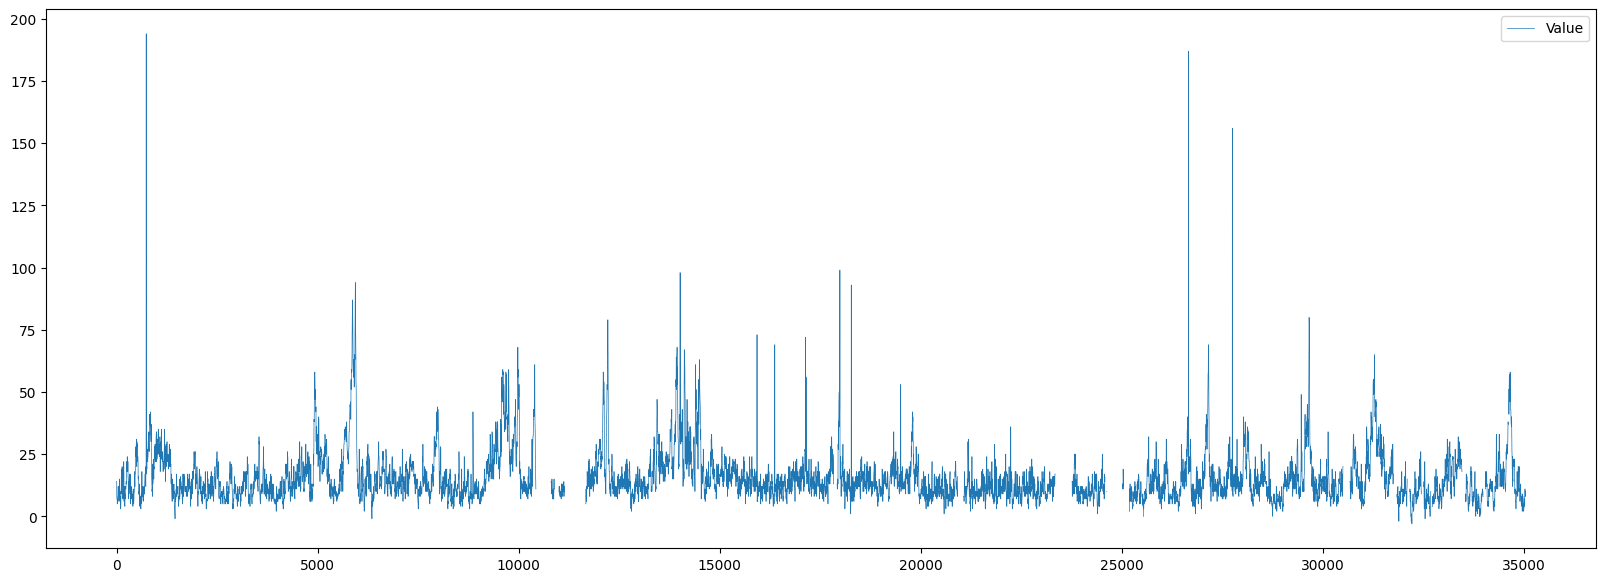

In [ ]:
# fig = plt.figure(figsize = (20,7))
air[['ReadingDateTime','Value']].plot(figsize = (20,7),linewidth=0.5)

In [ ]:
air.isnull().sum()

Site                          0
Species                       0
ReadingDateTime               0
Value                      2904
Units                         0
Provisional or Ratified       0
time                          0
dtype: int64

In [ ]:
air.isnull().sum()*100/len(air)

Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      8.287671
Units                      0.000000
Provisional or Ratified    0.000000
time                       0.000000
dtype: float64

En el resumen se puede observar que todas las mediciones fueron realizadas en el mismo sitio, solo hay una especie medida que es PM2.5, la unidad es la misma en todos los casos y las mediciones ratificadas. Las únicas variables útiles son `ReadingDateTime` y `Value`. En el caso de `Value` se observa que tiene 2904 NAs, a continuación se muestra como hacer el reemplazo por la mediana usando `replace_na` y `fill`. Al tratarse de una serie de tiempo, la opción de llenado con `fill` es la más indicada.

### Reemplazo con la mediana

### Reemplazo con `fillna`

In [ ]:
mediana_valor = air['Value'].median()
mediana_valor

# Este método solo se aplicará sobre variables numéricas
air_median = air.fillna({'Value':mediana_valor})

air_median.isnull().sum()

Site                       0
Species                    0
ReadingDateTime            0
Value                      0
Units                      0
Provisional or Ratified    0
time                       0
dtype: int64

<Axes: >

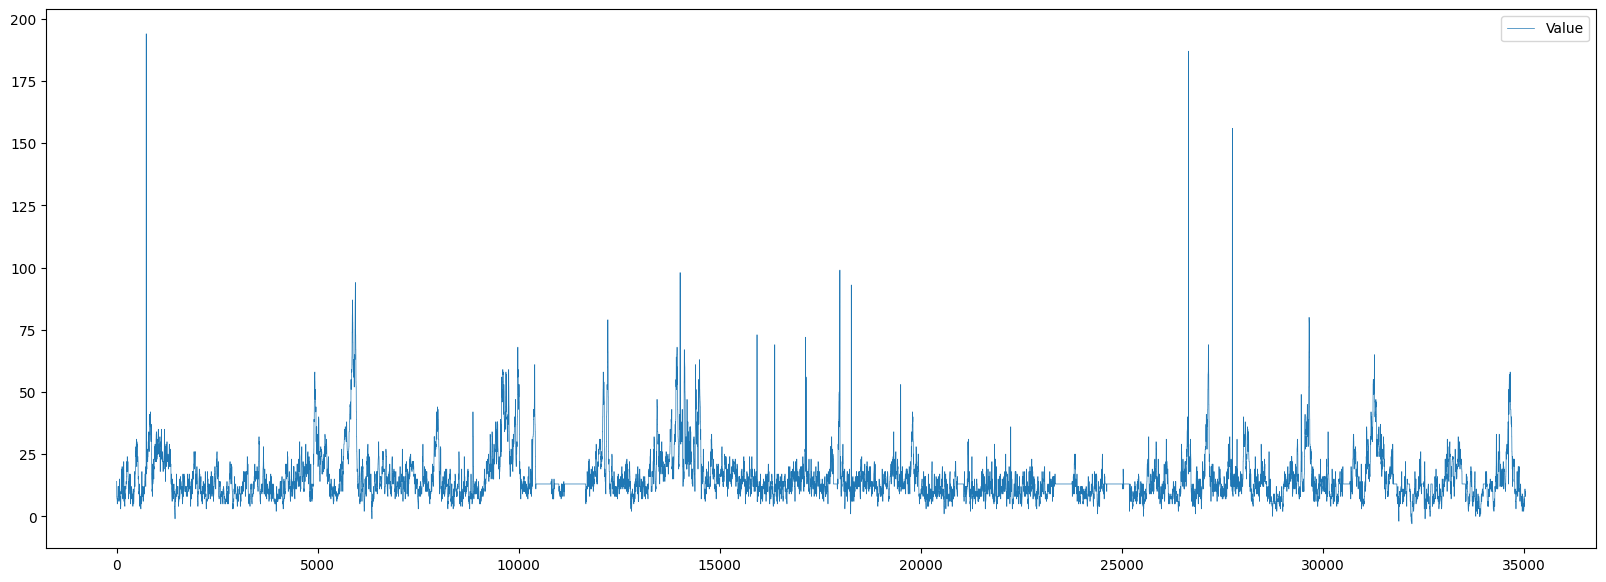

In [ ]:
air_median[['ReadingDateTime','Value']].plot(figsize = (20,7),linewidth=0.5)

Se pueden reemplazar los valores faltantes con las entradas previas o siguientes. Para más información de la función `fillna` consulte [aquí](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html).

In [ ]:
air = air.sort_values(by = 'time', ascending = True)

In [ ]:
air.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,time
0,CT2,PM2.5,01/01/2018 00:00,14.0,ug m-3,R,2018-01-01 00:00:00
1,CT2,PM2.5,01/01/2018 00:15,14.0,ug m-3,R,2018-01-01 00:15:00
2,CT2,PM2.5,01/01/2018 00:30,14.0,ug m-3,R,2018-01-01 00:30:00
3,CT2,PM2.5,01/01/2018 00:45,14.0,ug m-3,R,2018-01-01 00:45:00
4,CT2,PM2.5,01/01/2018 01:00,8.0,ug m-3,R,2018-01-01 01:00:00


In [ ]:
# con inplace=True se cambiar permanentemente el dataset
# el método ffill -forward fill- propaga la última observación válida para hacer el reemplazo
air_ffill = air.fillna(method='ffill')

air_ffill.isnull().sum()

Site                       0
Species                    0
ReadingDateTime            0
Value                      0
Units                      0
Provisional or Ratified    0
time                       0
dtype: int64

<Axes: >

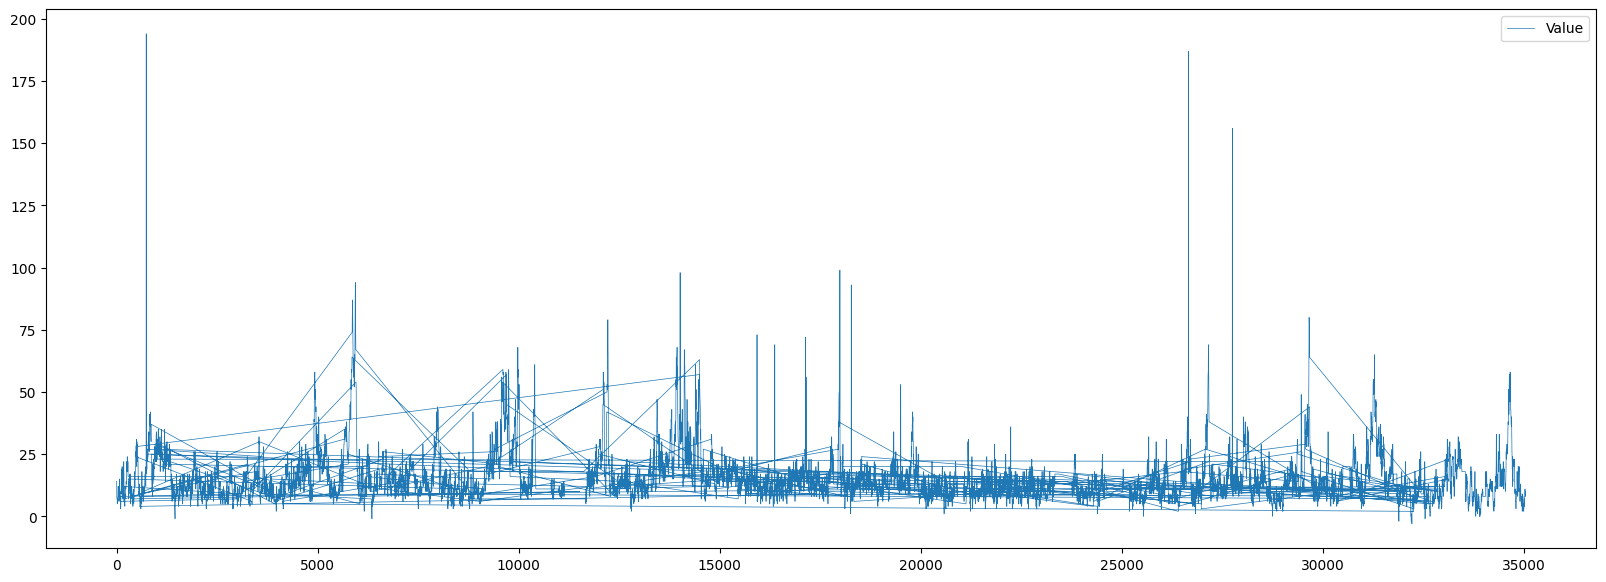

In [ ]:
air_ffill[['Value']].plot(figsize = (20,7),linewidth=0.5)

In [ ]:
# Tarea: aplicar método de interpolacion

**Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*